# Feb_22_01_52_16_m0.5_s0.35_nx192_nl36

name: Feb_22_01_52_16_m0.5_s0.35_nx192_nl36 \
black_hole_mass 0.5 \
black_hole_spin 0.35 \
compactification_length 1.0 \
evolve_time 150.0 (121) \
num_saved_times 150 (122) \
nx 192 \
nl 36 \
scd_order_start_time 8.807591456059475

In [1]:
import ringdown_fits as rdf
import numpy as np
import qnm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/alex/Desktop/tfm-xisco/ringdown-stuff/Examples')  # Añadir la ruta del script

from plot_psi4_jupyter_version import make_plot  # Importamos la función del script
plt.rcParams["figure.figsize"] = (12, 6)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

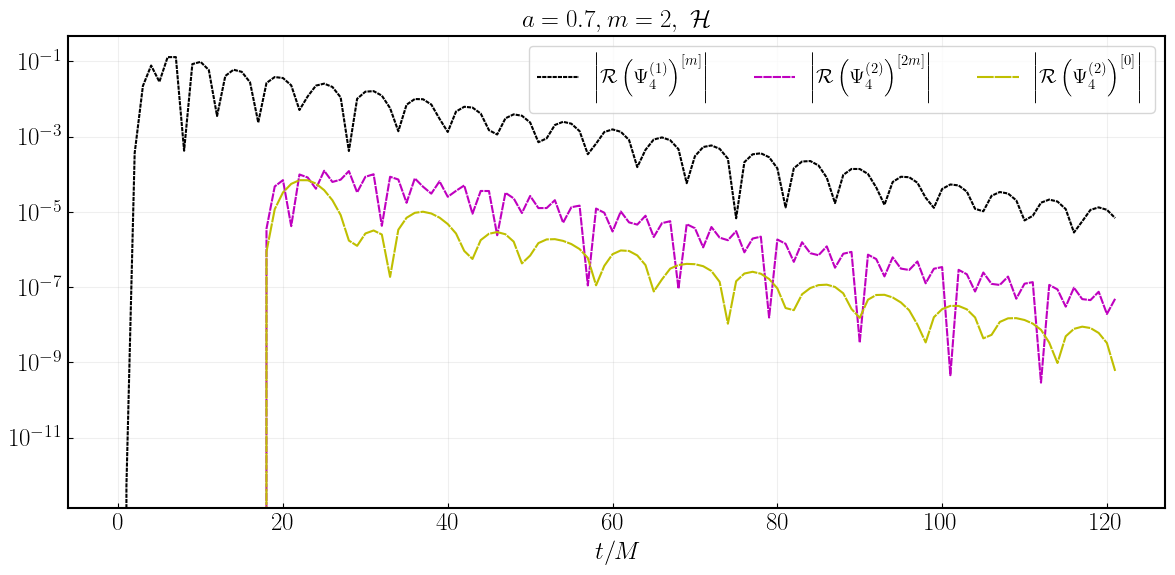

In [3]:
# Ruta de la carpeta que contiene los datos
data_directory = "/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36"

# Parámetros de la simulación
part = "re"  # O "im" para la parte imaginaria
loc = "horizon"  # O "horizon"

# Llamar a la función para graficar
make_plot(data_directory, part, loc)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

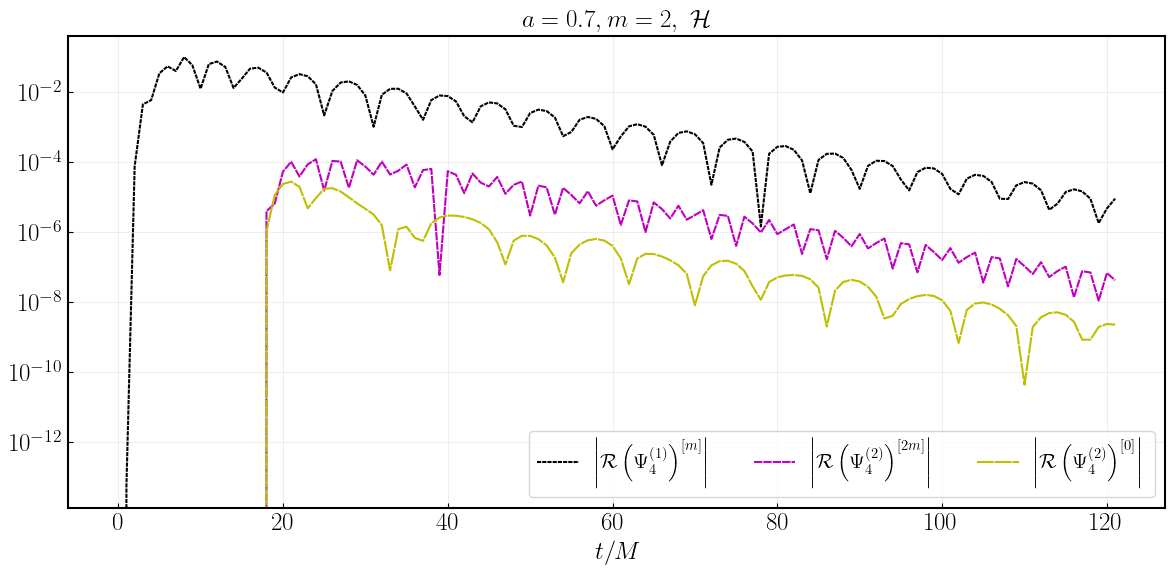

In [4]:
# Ruta de la carpeta que contiene los datos
data_directory = "/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36"

# Parámetros de la simulación
part = "im"  # O "im" para la parte imaginaria
loc = "horizon"  # O "horizon"

# Llamar a la función para graficar
make_plot(data_directory, part, loc)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

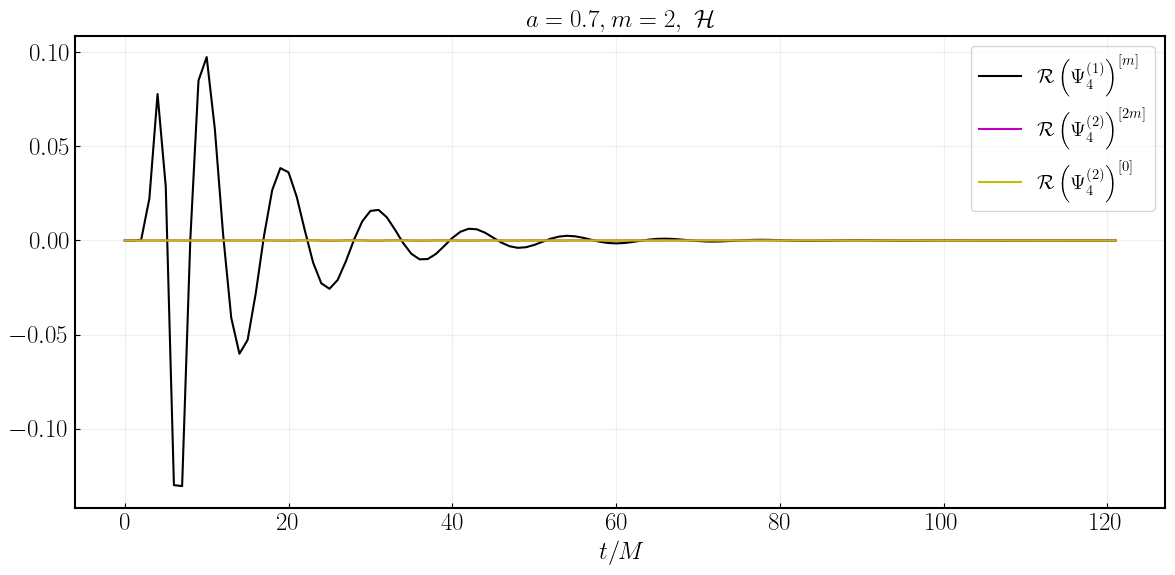

In [7]:
import os
from typing import List

from plot_params import *
from general_manip import read_sim_params, extract_mean_asymp, extract_mean_horizon

#==============================================================================
OUTPUT_DIR = '/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/'

data = "/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36" 
part = "re"  # "re" para la parte real, "im" para la imaginaria
loc = "horizon"  # "asym" para Scri+, "horizon" para el horizonte

directory = os.path.join(OUTPUT_DIR, data)

sim_params = read_sim_params(directory)
bhs = float(sim_params['black_hole_spin'])
bhm = float(sim_params['black_hole_mass'])
m_ang = int(sim_params['pm1_ang'])

# ubicación
if loc == "asym":
    extract_data = extract_mean_asymp
    loc_label = r'\mathcal{J}^{+}'  # Scri+
elif loc == "horizon":
    extract_data = extract_mean_horizon
    loc_label = r'\mathcal{H}'  # Horizonte
else:
    raise ValueError("Ubicación no válida. Usa 'asym' o 'horizon'.")

# Archivos de datos
psi4_1m = os.path.join(directory, f"lin_f_m{m_ang}_{part}.csv")
psi4_2m = os.path.join(directory, f"scd_f_m{2*m_ang}_{part}.csv")
psi4_0m = os.path.join(directory, f"scd_f_m0_{part}.csv")

# Extraer datos
t_1, vals_1m = extract_data(psi4_1m)
t_2, vals_2m = extract_data(psi4_2m)
t_3, vals_0m = extract_data(psi4_0m)

# Crear la figura
fig, ax = plt.subplots()
ax.plot(t_1, vals_1m, linestyle='-', color='k',
        label=r'$\mathcal{R}\left(\Psi_4^{(1)}\right)^{[m]}$')

ax.plot(t_2, vals_2m, linestyle='-', color='m',
        label=r'$\mathcal{R}\left(\Psi_4^{(2)}\right)^{[2m]}$')

ax.plot(t_3, vals_0m, linestyle='-', color='y',
        label=r'$\mathcal{R}\left(\Psi_4^{(2)}\right)^{[0]}$')

ax.legend(loc='best')
ax.set_xlabel(r'$t/M$')
ax.set_title(r'$a={}, m={}, \ {}$'.format(bhs/bhm, m_ang, loc_label))

ax.grid(which='major', axis='both', alpha=0.2)
plt.setp(ax.get_xticklabels())
plt.setp(ax.get_yticklabels())

plt.tight_layout()
plt.show()
plt.close()



In [13]:
df = pd.DataFrame({
    "t_1": t_1[:10], "vals_1m": vals_1m[:10]
})

print(df)

   t_1       vals_1m
0  0.0  0.000000e+00
1  1.0  5.126230e-13
2  2.0  3.639643e-04
3  3.0  2.226588e-02
4  4.0  7.782540e-02
5  5.0  2.874493e-02
6  6.0 -1.300168e-01
7  7.0 -1.305141e-01
8  8.0  4.225795e-04
9  9.0  8.497278e-02


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

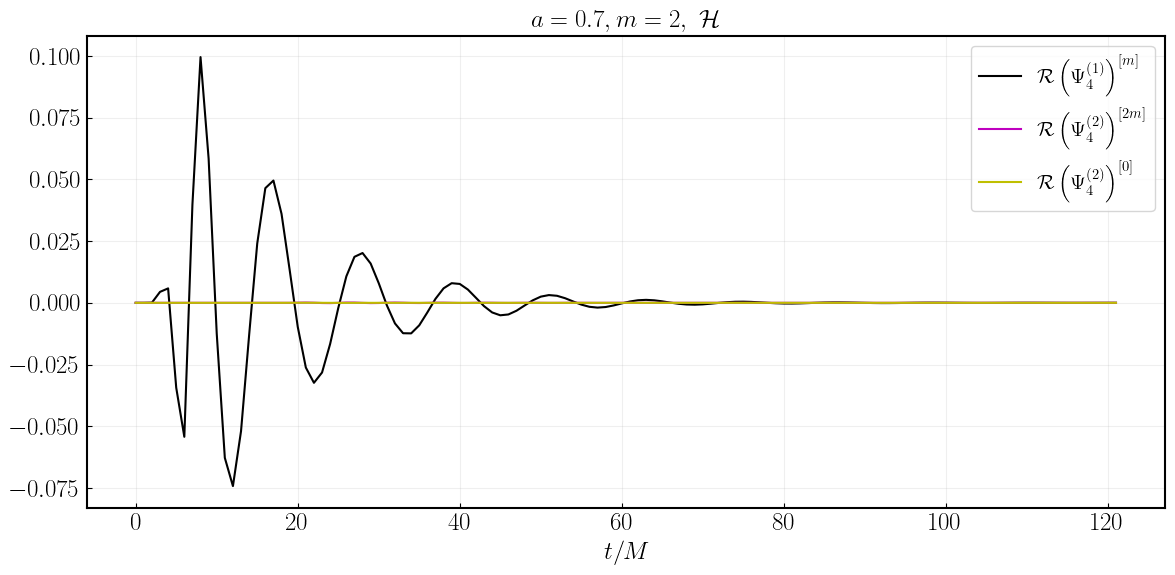

In [16]:
#==============================================================================
OUTPUT_DIR = '/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/'

data = "/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36" 
part = "im"  # "re" para la parte real, "im" para la imaginaria
loc = "horizon"  # "asym" para Scri+, "horizon" para el horizonte

directory = os.path.join(OUTPUT_DIR, data)

sim_params = read_sim_params(directory)
bhs = float(sim_params['black_hole_spin'])
bhm = float(sim_params['black_hole_mass'])
m_ang = int(sim_params['pm1_ang'])

# ubicación
if loc == "asym":
    extract_data = extract_mean_asymp
    loc_label = r'\mathcal{J}^{+}'  # Scri+
elif loc == "horizon":
    extract_data = extract_mean_horizon
    loc_label = r'\mathcal{H}'  # Horizonte
else:
    raise ValueError("Ubicación no válida. Usa 'asym' o 'horizon'.")

# Archivos de datos
psi4_1m_im = os.path.join(directory, f"lin_f_m{m_ang}_{part}.csv")
psi4_2m_im = os.path.join(directory, f"scd_f_m{2*m_ang}_{part}.csv")
psi4_0m_im = os.path.join(directory, f"scd_f_m0_{part}.csv")

# Extraer datos
t_1_im, vals_1m_im = extract_data(psi4_1m_im)
t_2_im, vals_2m_im = extract_data(psi4_2m_im)
t_3_im, vals_0m_im = extract_data(psi4_0m_im)

# Crear la figura
fig, ax = plt.subplots()
ax.plot(t_1_im, vals_1m_im, linestyle='-', color='k',
        label=r'$\mathcal{R}\left(\Psi_4^{(1)}\right)^{[m]}$')

ax.plot(t_2_im, vals_2m_im, linestyle='-', color='m',
        label=r'$\mathcal{R}\left(\Psi_4^{(2)}\right)^{[2m]}$')

ax.plot(t_3_im, vals_0m_im, linestyle='-', color='y',
        label=r'$\mathcal{R}\left(\Psi_4^{(2)}\right)^{[0]}$')

ax.legend(loc='best')
ax.set_xlabel(r'$t/M$')
ax.set_title(r'$a={}, m={}, \ {}$'.format(bhs/bhm, m_ang, loc_label))

ax.grid(which='major', axis='both', alpha=0.2)
plt.setp(ax.get_xticklabels())
plt.setp(ax.get_yticklabels())

plt.tight_layout()
plt.show()
plt.close()

In [17]:
df = pd.DataFrame({
    "t_1_im": t_1_im[:10], "vals_1m_im": vals_1m_im[:10]
})

print(df)

   t_1_im    vals_1m_im
0     0.0  0.000000e+00
1     1.0  5.466775e-14
2     2.0  7.607391e-05
3     3.0  4.441479e-03
4     4.0  5.850047e-03
5     5.0 -3.438809e-02
6     6.0 -5.430334e-02
7     7.0  3.978558e-02
8     8.0  9.960707e-02
9     9.0  5.844707e-02


In [31]:
# Crear los tiempos complejos
t_1_complex = t_1 + 1j * 0

# Crear los valores complejos
vals_1m_complex = vals_1m + 1j * vals_1m_im

In [32]:
# Combinar los tiempos complejos con los valores complejos
final_array = np.column_stack((t_1_complex, vals_1m_complex))

In [71]:
final_array

array([[[ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 1.00000000e+00+0.00000000e+00j,
          5.12623028e-13+5.46677526e-14j],
        [ 2.00000000e+00+0.00000000e+00j,
          3.63964321e-04+7.60739068e-05j],
        [ 3.00000000e+00+0.00000000e+00j,
          2.22658808e-02+4.44147863e-03j],
        [ 4.00000000e+00+0.00000000e+00j,
          7.78253973e-02+5.85004749e-03j],
        [ 5.00000000e+00+0.00000000e+00j,
          2.87449330e-02-3.43880917e-02j],
        [ 6.00000000e+00+0.00000000e+00j,
         -1.30016803e-01-5.43033350e-02j],
        [ 7.00000000e+00+0.00000000e+00j,
         -1.30514123e-01+3.97855805e-02j],
        [ 8.00000000e+00+0.00000000e+00j,
          4.22579499e-04+9.96070688e-02j],
        [ 9.00000000e+00+0.00000000e+00j,
          8.49727820e-02+5.84470683e-02j],
        [ 1.00000000e+01+0.00000000e+00j,
          9.74455048e-02-1.24422736e-02j],
        [ 1.10000000e+01+0.00000000e+00j,
          5.90845182e-0

In [42]:
def QNM_spectrum(l,m,n,mass,spin):
    """ It computes the RD frequencies and damping times in NR units.
    """  
    omegas_new=modes_spec[-2,l,m,n](spin)[0]
    w_m_a = (np.real(omegas_new))/mass
    tau_m_a=-1/(np.imag(omegas_new))*mass

    return (np.array([w_m_a]), np.array([tau_m_a]))

def QNM_spectrum_w(l,m,n,mass,spin):
    """ It computes the RD frequencies and damping times in NR units.
    """  
    omegas_new=modes_spec[-2,l,m,n](spin)[0]/mass

    return omegas_new

def QNM_spectrum_re_im(l,m,n,mass,spin):
    """ It computes the RD frequencies and damping times in NR units.
    """  
    omegas_new=modes_spec[-2,l,m,n](spin)[0]
    w_re = (np.real(omegas_new))/mass
    w_im = (np.imag(omegas_new))/mass

    return w_re+1j*w_im

def delta_omega(omega_fit, omega_target):
    
    r_fit = np.real(omega_fit)
    i_fit = np.imag(omega_fit)
    
    r_target = np.real(omega_target)
    i_target = np.imag(omega_target)
    
    return np.sqrt(((r_fit-r_target)/r_target)**2 + ((i_fit-i_target)/i_target)**2)

In [50]:
file_path = "/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_re.csv"
from io_csv import read_times_vals_csv_2d
# Leer los datos del CSV
times, psi4_matrices = read_times_vals_csv_2d(file_path)

# Convertir `times` en un array de NumPy
times = np.array(times)

# Índice del horizonte (la primera fila de la matriz)
horizon_index = 0  

# Extraer los valores en el horizonte
psi_values_horizon = psi4_matrices[:, horizon_index, :]
j=0
psi_horizon = psi_values_horizon[:, j]

# Estructura final (solo horizonte)
hpnr1090 = [(times, psi_values_horizon)]

In [103]:
s, l, m = [(-2,-2,-2,-2),(2,4,4,2),(0,0,4,2)]
mode_list = [(s[i], l[i], m[i], n) for n in np.arange(0,8) for i in range(len(m))]
modes_spec = { ind : qnm.modes_cache(*ind) for ind in mode_list }

In [146]:
qnmspec=np.array([QNM_spectrum(2,2,n,0.5,0.7) for n in range(8)]) 
args = {'qnms': qnmspec, 'real': False}

fitres=rdf.fit_qnm((final_array[0]),[0.1,0.5],t0 = 20,linear = True, model = 'w-tau-fixed',
               min_method = 'Nelder-Mead', tol=1e-8,bounds = None,**args)
fitres

array([ 0.00050352+0.00045887j, -0.00426055+0.00103439j])

In [147]:
fit_model = rdf.rd_model_wtau_fixed(fitres,times = t_1_complex,**args)

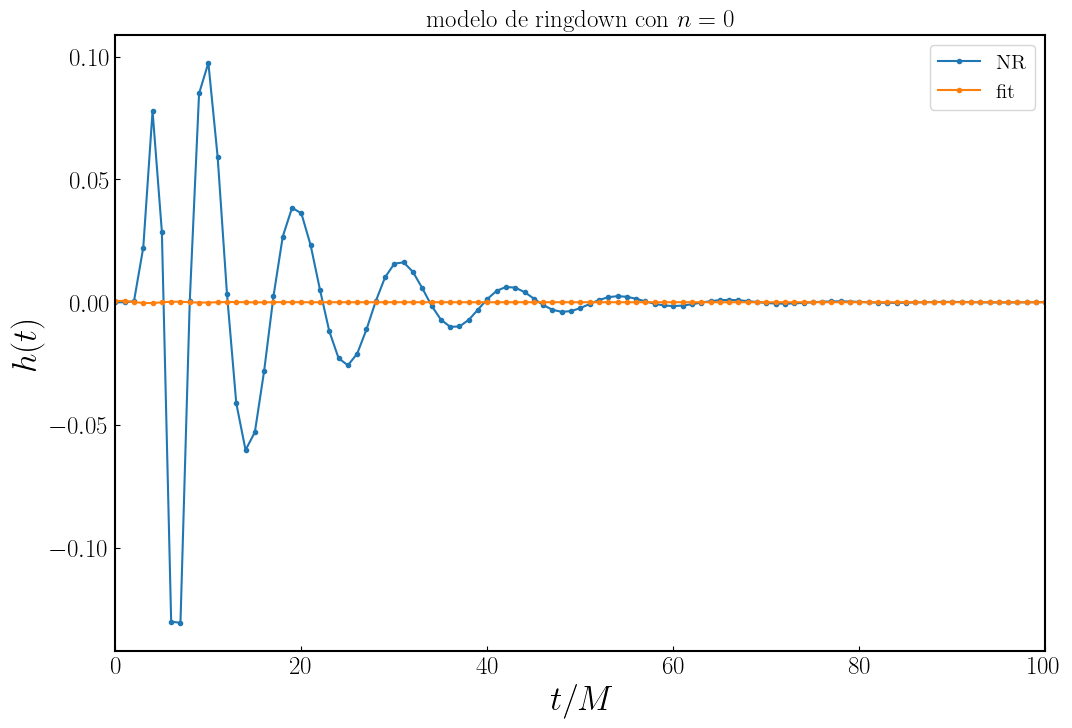

In [148]:
plt.figure(figsize=(12, 8))
plt.plot(t_1_complex, vals_1m, linestyle='-', marker='o', markersize=3,label = 'NR')
plt.plot(t_1_complex, fit_model, linestyle='-', marker='o', markersize=3,label = 'fit')

plt.legend()
plt.xlabel('$t/M$', fontsize=25)
plt.ylabel('$h(t)$', fontsize=25)
plt.title("modelo de ringdown con $n=0$")
plt.xlim(0,100)
plt.show()

### 